<a href="https://colab.research.google.com/github/Mufacoderz/ai-fruit-detector/blob/main/Model_Training_Buah_buahan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import os
import cv2


# get drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/dataset buah'

Mounted at /content/drive


# Pre processign gmbar


## Train

In [ ]:
x_train = []
y_train = []

labels = [
    "apple fruit",
    "banana fruit",
    "cherry fruit",
    "chickoo fruit",
    "grapes fruit",
    "kiwi fruit",
    "mango fruit",
    "orange fruit",
    "strawberry fruit"
]

image_size = 224

for label in labels:

    # Menggabungkan jalur utama drive dgn nama kelas
    folderPath = os.path.join(data_dir, label)

    if not os.path.exists(folderPath):
        print(f"Folder kelas TIDAK ditemukan: {folderPath}")
        continue  # Lewati jika folder tidak ada

    # Loop semua file dalam folder kelas
    for path in os.listdir(folderPath):

        image_path = os.path.join(folderPath, path)

        # Hanya memproses jika benar-benar file
        if not os.path.isfile(image_path):
            continue

        try:
            # Membaca gambar
            image = cv2.imread(image_path)

            if image is None:
                print(f"Gagal membaca gambar: {image_path}")
                continue

            # Resize
            image = cv2.resize(image, (image_size, image_size))

            # Normalisasi (opsional)
            image = image / 255.0

            x_train.append(image)
            y_train.append(label)

        except Exception as e:
            print(f"Error saat memproses {image_path}: {e}")
            continue

# Mengubah list menjadi NumPy array
x_train_np = np.array(x_train)
y_train_np = np.array(y_train)

print("\n... Pembuatan data selesai ...")
print(f"Total gambar: {len(x_train_np)}")
print(f"Total label: {len(y_train_np)}")

if len(x_train_np) > 0:
    print(f"Shape gambar: {x_train_np.shape}")



... Pembuatan data selesai ...
Total gambar: 360
Total label: 360
Shape gambar: (360, 224, 224, 3)


## Test

In [ ]:
from math import gamma
x_test = []
y_test = []

print(".... Memulai pembuatan data testing dari drive")

for label in labels:

    # Menggabungkan data_dir drive sebagai dir utama
    folderPath = os.path.join(data_dir, label)

    # Peringatan jika folder tidak ditemukan
    if not os.path.exists(folderPath):
        print(f"Folder kelas TIDAK ditemukan: {folderPath}")
        continue  # Lewati ke label berikutnya

    for path in os.listdir(folderPath):
        image_path = os.path.join(folderPath, path)

        # Hanya memproses jika benar-benar file
        if not os.path.isfile(image_path):
            continue

        if not os.path.exists(image_path):
            print(f"Data hilang: {image_path}")
            continue

        try:
            image = cv2.imread(image_path)

            if image is None:
                print(f"Gambar gagal dibaca: {image_path}")
                continue

            # resize gambar
            image = cv2.resize(image, (image_size, image_size))

            # normalisasi (opsional)
            image = image / 255.0

            x_test.append(image)
            y_test.append(label)

        except Exception as e:
            print(f"Error saat memproses {image_path}: {e}")
            continue

# ubah ke numpy array
x_test_np = np.array(x_test)
y_test_np = np.array(y_test)

print("\n.... Pembuatan data testing selesai ...")
print(f"Total gambar yang dimuat (x_test): {len(x_test_np)}")
print(f"Total label yang dimuat (y_test): {len(y_test_np)}")
if len(x_test_np) > 0:
    print(f"Shape gambar (x_test): {x_test_np.shape}")




.... Memulai pembuatan data testing dari drive

.... Pembuatan data testing selesai ...
Total gambar yang dimuat (x_test): 360
Total label yang dimuat (y_test): 360
Shape gambar (x_test): (360, 224, 224, 3)


## konversi ke numpy array

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train, y_train = shuffle(x_train, y_train, random_state= 42)

In [ ]:
lbl_encoder = LabelEncoder()
y_train = lbl_encoder.fit_transform(y_train)
y_test = lbl_encoder.transform(y_test)

In [ ]:
y_train = to_categorical(y_train, num_classes=9)
y_test = to_categorical(y_test, num_classes=9)

In [ ]:
datagen = ImageDataGenerator(
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale = 1.0 / 255.0
)

In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (360, 224, 224, 3)
x_test shape: (360, 224, 224, 3)
y_train shape: (360, 9)
y_test shape: (360, 9)


In [ ]:
model = Sequential()

# Layer 1
model.add(Conv2D(
    filters=16,
    kernel_size=(3, 3),
    padding="same",
    activation="relu",
    input_shape=(224, 224, 3)
))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation="relu"
))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

# Fully connected
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(9, activation="softmax"))   # 9 kelas buah

# Learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)




In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
history = model.fit(x_train , y_train , verbose=1, epochs=30, batch_size=32,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.1121 - loss: 6.8298 - val_accuracy: 0.1806 - val_loss: 2.1777
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2440 - loss: 2.0226 - val_accuracy: 0.4306 - val_loss: 1.7088
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4600 - loss: 1.6501 - val_accuracy: 0.5694 - val_loss: 1.3378
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5983 - loss: 1.2146 - val_accuracy: 0.7778 - val_loss: 0.8859
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7559 - loss: 0.8142 - val_accuracy: 0.9306 - val_loss: 0.5074
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9040 - loss: 0.4871 - val_accuracy: 0.9444 - val_loss: 0.3022
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9579 - loss: 0.2481 - val_accuracy: 0.9583 - val_loss: 0.1950
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9732 - loss: 0.1529 - val_accuracy: 0.9889 - val_loss:

In [71]:
history.history["accuracy"]

[0.11944444477558136,
 0.2750000059604645,
 0.4611110985279083,
 0.5944444537162781,
 0.7222222089767456,
 0.9083333611488342,
 0.9388889074325562,
 0.9722222089767456,
 0.9833333492279053,
 1.0,
 0.9972222447395325,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

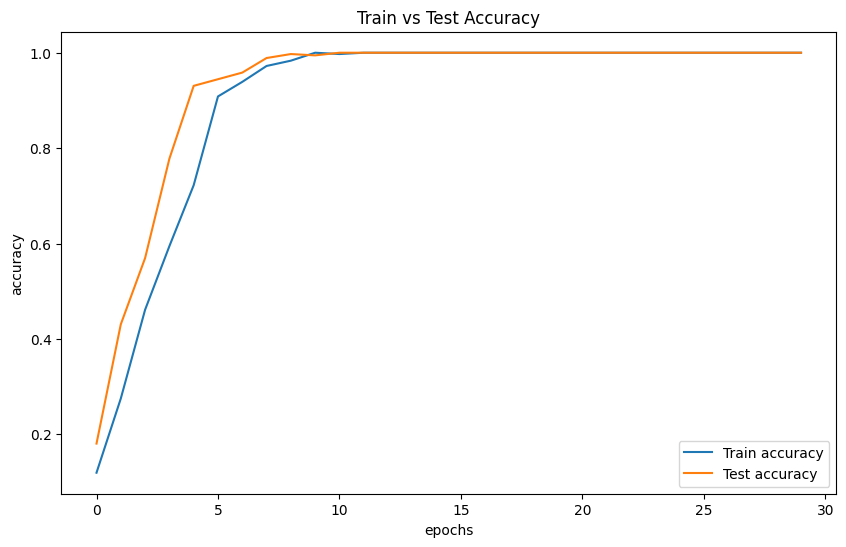

In [72]:
plt.figure(figsize=(10, 6))
sns.lineplot(history.history["accuracy"], label="Train accuracy")
sns.lineplot(history.history["val_accuracy"], label="Test accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Train vs Test Accuracy")
plt.legend()
plt.show()

In [73]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
### target_naes = list(labels.keys())

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step


In [74]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        40

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

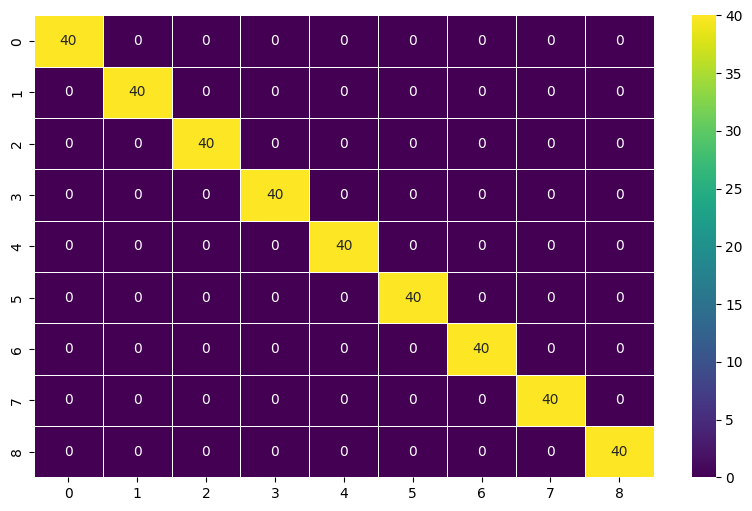

In [75]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap="viridis",linewidths=0.5 , fmt="d")
plt

In [76]:
model_save_path = "/content/drive/MyDrive/fruit_classifier.h5"
model.save(model_save_path)